In [ ]:
#instalando bibliotecas utilizadas no projeto

pip install pandas --quiet
pip install tweepy --quiet
pip install wordcloud --quiet
pip install nltk --quiet
pip install matplot --quiet

In [65]:
#import de bibliotecas

import re
import nltk
import pandas as pd
import tweepy as tw
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [66]:
# autenticação na api do twitter

with open('bearer-token.txt', 'r') as tokenfile:
    bearer_token = tokenfile.readline().strip('\n')
client = tw.Client(bearer_token)

In [67]:
# buscando tweets na api
# os parâmetros de busca dos itens 02 e 03 variam de acordo com acontecimentos
# e fatos noticiados na mídia

In [69]:
# 01 query de busca somente por #Eleições2020
tag_eleicoes = "#Eleições2022"
response_01 = client.search_recent_tweets(tag_eleicoes, max_results=100)

In [72]:
for tt in response_01.data: 
    print(tt.text)
    print( )

Esse pessoal que tá se candidatando #Eleicoes2022 é pra ajudar ou mamar nas tetas do povo!?🫤

"Tijolinho" vivo
#Eleicoes2022 https://t.co/5KXYyDQUuU

#QueenElizabeth #mortedarainha
#7desetembro #IDH2022 #Eleições2022
O que Tudo isso tem a ver?
https://t.co/Dp5iiKkRII

Hoje a noite, ás 20h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. 

Na quarta, 14, o instituto divulgará a pesquisa para o governo da Bahia e senado, esta contratada pela @metropole. #Eleicoes2022

RT @fabiofcd16: EU VOU VOTAR NO LULA PRESIDENTE 13❤️⭐️🙏 E FORA BOLSONARO !!! TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.
#lula #Eleicoes2022 #…

É ISSO MESMO POVO DE DEUS... OS MANDANTES DA TENTATIVA DE MATAR O @jairbolsonaro É O @LulaOficial E ALGUNS MINISTROS  DO @STF_oficial ... TEM UMA DENÚNCIA RODANDO NO TWITTER DE @LedaNagle... E SEGUNDO ELA, A INFORMAÇÃO VEM DA PRÓPRIA @PoliciaFedeeral .
#Eleições2022 #Brasil

RT @JTabw: #Bolsonaro inimigo da humanidade e dos #Pobr

In [87]:
# 02 query de busca removendo tags indesejadas
tag_eleicoes_menos_indesejadas = "#Eleições2022 -#SOSBrasil -#BrasilDaEsperanca -#AbusoDePoder -#Elizabeth -#ElizabethII -#rainhaelizabeth"
response_02 = client.search_recent_tweets(tag_eleicoes_menos_indesejadas, max_results=100)

In [92]:
# 03 query de busca com a tag da semana
tag_eleicoes_tag_semana = "#Eleições2022 QueenElizabeth"
response_03 = client.search_recent_tweets(tag_eleicoes_tag_semana, max_results=100)

[<Tweet id=1568235455908384770 text='#QueenElizabeth #mortedarainha\n#7desetembro #IDH2022 #Eleições2022\nO que Tudo isso tem a ver?\nhttps://t.co/Dp5iiKkRII'>, <Tweet id=1568194234406129666 text='#Politica  #QueenElizabeth \n#Eleicoes2022 \n#Eleições2022 \n#eleicoes https://t.co/VciOM3GPNi'>, <Tweet id=1568156614032498690 text='Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, talvez a prioridade da cidadania seria outra.\n#QueenElizabeth #GunsNRosesNoRockinRio2022 #Eleicoes2022 \n#Flamengo #FLAxVEL \n#Bomdia'>, <Tweet id=1568058209373487107 text='#QueenElizabeth #lula #Eleicoes2022 @Anitta @luisasonza @juliette @BiancaAndrade @FilipeRet @GilDoVigor @Dra_Deolane @gioewbank @brunogagliasso https://t.co/IoJtpwaEet'>, <Tweet id=1568028455966576641 text='RT @RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022\n#QueenElizabeth @RRSoares_…'>, <Tweet id=156802726

In [82]:
# 04 query de busca com termos relacionados ao estado do Acre
tag_eleicoes_acre = "#Eleições2022 eleições acre -#SOSBrasil -#BrasilDaEsperanca -#AbusoDePoder"
response_04 = client.search_recent_tweets(tag_eleicoes_acre, max_results=100)

In [93]:
# atribuindo propriedade data do response as variáveis

tts_01 = response_01.data
tts_02 = response_02.data
tts_03 = response_03.data
tts_04 = response_04.data

In [59]:
# imprimindo tweets (opcional)

In [78]:
print("---------------------------------tts_01---------------------------------")
for tt in tts_01: 
    print(tt.text)
    print( )

---------------------------------tts_01---------------------------------
Esse pessoal que tá se candidatando #Eleicoes2022 é pra ajudar ou mamar nas tetas do povo!?🫤

"Tijolinho" vivo
#Eleicoes2022 https://t.co/5KXYyDQUuU

#QueenElizabeth #mortedarainha
#7desetembro #IDH2022 #Eleições2022
O que Tudo isso tem a ver?
https://t.co/Dp5iiKkRII

Hoje a noite, ás 20h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. 

Na quarta, 14, o instituto divulgará a pesquisa para o governo da Bahia e senado, esta contratada pela @metropole. #Eleicoes2022

RT @fabiofcd16: EU VOU VOTAR NO LULA PRESIDENTE 13❤️⭐️🙏 E FORA BOLSONARO !!! TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.
#lula #Eleicoes2022 #…

É ISSO MESMO POVO DE DEUS... OS MANDANTES DA TENTATIVA DE MATAR O @jairbolsonaro É O @LulaOficial E ALGUNS MINISTROS  DO @STF_oficial ... TEM UMA DENÚNCIA RODANDO NO TWITTER DE @LedaNagle... E SEGUNDO ELA, A INFORMAÇÃO VEM DA PRÓPRIA @PoliciaFedeeral .
#Elei

In [84]:
print("---------------------------------tts_02---------------------------------")
for tt in tts_02: 
    print(tt.text)
    print( )

---------------------------------tts_02---------------------------------
Datafolha divulga nova pesquisa eleitoral nesta sexta-feira (9) https://t.co/dckk2l1kC8 #Eleicoes2022 #pesquisa https://t.co/hJ8zhUIFTW

#jairbolsonaro #live #dinheiro #imoveis #bolsonaro #eleições2022

RT @rosangelamorosp: Falta menos de um mês, pessoal! Sou Rosangela Moro: a voz da Lava Jato em São Paulo. Contra os extremos, quero São Pau…

Caravana de Carlos Brandão percorre mais cinco municípios https://t.co/orVLPz1Imu
#noticiasmaranhao #maranhão #saoluis #slz #slzma
#noticias #blogdoezequielslz #Eleicoes2022 #carlosbrandão https://t.co/dHvUvSB0f2

Enquanto isso no #Brasil, "heróis" brigam para "salvar" o país!
#Brazil #Eleicoes2022 #Eleições2022 #eleicoes #eleicao https://t.co/nlrxgz30F8

Nesta eleição, não deixe pra depois, vote em Bolsonaro apertando o 22! 🇧🇷🇧🇷
#Eleições2022 https://t.co/kD7axSqp1L

RT @Datoworld: 🇧🇷 #Eleicoes2022 - Mitin electoral del candidato Jair Bolsonaro 🔵 en el día de la independenci

In [94]:
print("---------------------------------tts_03---------------------------------")
for tt in tts_03: 
    print(tt.text)
    print( )

---------------------------------tts_03---------------------------------
#QueenElizabeth #mortedarainha
#7desetembro #IDH2022 #Eleições2022
O que Tudo isso tem a ver?
https://t.co/Dp5iiKkRII

#Politica  #QueenElizabeth 
#Eleicoes2022 
#Eleições2022 
#eleicoes https://t.co/VciOM3GPNi

Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, talvez a prioridade da cidadania seria outra.
#QueenElizabeth #GunsNRosesNoRockinRio2022 #Eleicoes2022 
#Flamengo #FLAxVEL 
#Bomdia

#QueenElizabeth #lula #Eleicoes2022 @Anitta @luisasonza @juliette @BiancaAndrade @FilipeRet @GilDoVigor @Dra_Deolane @gioewbank @brunogagliasso https://t.co/IoJtpwaEet

RT @RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022
#QueenElizabeth @RRSoares_…

Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022
#QueenElizabeth @RRSoares_ @BispoMacedo #Charlatão #Ban

In [95]:
print("---------------------------------tts_04---------------------------------")
for tt in tts_04: 
    print(tt.text)
    print()

---------------------------------tts_04---------------------------------
RT @ogabrielgg: Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, intervenção milit…

Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, intervenção militar????

#7DeSetembro #SeteDeSetembro #DiaDaIndependencia #Eleicoes #Eleicoes2022 https://t.co/y3PTSPVXny



In [96]:
# agrupar coleção de tweets em dataframes

lista_tts_01 = [[tt.text] for tt in tts_01]
lista_tts_02 = [[tt.text] for tt in tts_02]
lista_tts_03 = [[tt.text] for tt in tts_03]
lista_tts_04 = [[tt.text] for tt in tts_04]

dataframe_01 = pd.DataFrame(lista_tts_01, columns=['Tweet-DF01'])
dataframe_02 = pd.DataFrame(lista_tts_02, columns=['Tweet-DF02'])
dataframe_03 = pd.DataFrame(lista_tts_03, columns=['Tweet-DF03'])
dataframe_04 = pd.DataFrame(lista_tts_04, columns=['Tweet-DF04'])

In [97]:
# exibir os dataframes (opcional)
pd.options.display.max_colwidth = 130 # tamanho máximo da coluna do dataframe

In [98]:
dataframe_01.head() # exibir os primeiros 5 itens do dataframe 01

Tweet-DF01
0                                       Esse pessoal que tá se candidatando #Eleicoes2022 é pra ajudar ou mamar nas tetas do povo!?🫤
1                                                                            "Tijolinho" vivo\n#Eleicoes2022 https://t.co/5KXYyDQUuU
2           #QueenElizabeth #mortedarainha\n#7desetembro #IDH2022 #Eleições2022\nO que Tudo isso tem a ver?\nhttps://t.co/Dp5iiKkRII
3  Hoje a noite, ás 20h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. ...
4  RT @fabiofcd16: EU VOU VOTAR NO LULA PRESIDENTE 13❤️⭐️🙏 E FORA BOLSONARO !!! TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.\n#lula #...

In [99]:
dataframe_02.head() # exibir os primeiros 5 itens do dataframe 02

Tweet-DF02
0                                                 Eles brigam enquanto o Romário está com 32%. #Eleicoes2022 https://t.co/638ef4PxRD
1  Quem lembra desse momento sublime onde o Boechat manda um recado,ao vivo, pro Malafaia na Band News FM.\nMalafaia que fez oraç...
2  👇\n\n... mais um ministro preso ou investigado em #Brasília ; " vamos reconstruir o #Brazil ! Eu espero #Eleições2022 https://...
3  Os eleitores catarinenses terão mais uma inovação nas #eleições2022. A solução tecnológica que visa atestar a confiabilidade d...
4  Faltam 23 dias para o 1º turno das #Eleicoes2022.\n\nFaltam 114 dias, 2 horas e 59 minutos para o fim do governo do Mulestia d...

In [100]:
dataframe_03.head() # exibir os primeiros 5 itens do dataframe 03

Tweet-DF03
0           #QueenElizabeth #mortedarainha\n#7desetembro #IDH2022 #Eleições2022\nO que Tudo isso tem a ver?\nhttps://t.co/Dp5iiKkRII
1                                     #Politica  #QueenElizabeth \n#Eleicoes2022 \n#Eleições2022 \n#eleicoes https://t.co/VciOM3GPNi
2  Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, t...
3  #QueenElizabeth #lula #Eleicoes2022 @Anitta @luisasonza @juliette @BiancaAndrade @FilipeRet @GilDoVigor @Dra_Deolane @gioewban...
4  RT @RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022\n#QueenElizabe...

In [101]:
dataframe_04.head() # exibir os primeiros 5 itens do dataframe 04

Tweet-DF04
0  RT @ogabrielgg: Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, inte...
1  Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, intervenção militar?...

In [102]:
# agrupar tweets em uma única string para criação da wordcloud

tts_string_01 = pd.Series(dataframe_01['Tweet-DF01'].values).str.cat(sep=' ')# concatenação dos tts separados por espaço
tts_string_02 = pd.Series(dataframe_02['Tweet-DF02'].values).str.cat(sep=' ')# concatenação dos tts separados por espaço
tts_string_03 = pd.Series(dataframe_03['Tweet-DF03'].values).str.cat(sep=' ')# concatenação dos tts separados por espaço
tts_string_04 = pd.Series(dataframe_04['Tweet-DF04'].values).str.cat(sep=' ')# concatenação dos tts separados por espaço


In [71]:
# exibir as strings (opcional)

In [103]:
print("---------------------------------tts_string_01---------------------------------")
tts_string_01

---------------------------------tts_string_01---------------------------------


'Esse pessoal que tá se candidatando #Eleicoes2022 é pra ajudar ou mamar nas tetas do povo!?\U0001fae4 "Tijolinho" vivo\n#Eleicoes2022 https://t.co/5KXYyDQUuU #QueenElizabeth #mortedarainha\n#7desetembro #IDH2022 #Eleições2022\nO que Tudo isso tem a ver?\nhttps://t.co/Dp5iiKkRII Hoje a noite, ás 20h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. \n\nNa quarta, 14, o instituto divulgará a pesquisa para o governo da Bahia e senado, esta contratada pela @metropole. #Eleicoes2022 RT @fabiofcd16: EU VOU VOTAR NO LULA PRESIDENTE 13❤️⭐️🙏 E FORA BOLSONARO !!! TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.\n#lula #Eleicoes2022 #… É ISSO MESMO POVO DE DEUS... OS MANDANTES DA TENTATIVA DE MATAR O @jairbolsonaro É O @LulaOficial E ALGUNS MINISTROS  DO @STF_oficial ... TEM UMA DENÚNCIA RODANDO NO TWITTER DE @LedaNagle... E SEGUNDO ELA, A INFORMAÇÃO VEM DA PRÓPRIA @PoliciaFedeeral .\n#Eleições2022 #Brasil RT @JTabw: #Bolsonaro inimigo da humanidade

In [104]:
print("---------------------------------tts_string_02---------------------------------")
tts_string_02

---------------------------------tts_string_02---------------------------------


'Eles brigam enquanto o Romário está com 32%. #Eleicoes2022 https://t.co/638ef4PxRD Quem lembra desse momento sublime onde o Boechat manda um recado,ao vivo, pro Malafaia na Band News FM.\nMalafaia que fez oração pro sistema eleitoral travar. #Eleicoes2022 https://t.co/QVuR2v5bzR 👇\n\n... mais um ministro preso ou investigado em #Brasília ; " vamos reconstruir o #Brazil ! Eu espero #Eleições2022 https://t.co/yt5yekR7IO Os eleitores catarinenses terão mais uma inovação nas #eleições2022. A solução tecnológica que visa atestar a confiabilidade do processo eleitoral é o aplicativo QR Tot, desenvolvido pelo TRE-SC para trazer mais transparência na totalização dos votos. \nhttps://t.co/6gx7Q4NRbK Faltam 23 dias para o 1º turno das #Eleicoes2022.\n\nFaltam 114 dias, 2 horas e 59 minutos para o fim do governo do Mulestia dos cachorro.\n\n51 IMÓVEIS EM DINHEIRO VIVO https://t.co/wmk4xzIBzr RT @rosangelamorosp: Falta menos de um mês, pessoal! Sou Rosangela Moro: a voz da Lava Jato em São Paulo.

In [105]:
print("---------------------------------tts_string_03---------------------------------")
tts_string_03

---------------------------------tts_string_03---------------------------------


'#QueenElizabeth #mortedarainha\n#7desetembro #IDH2022 #Eleições2022\nO que Tudo isso tem a ver?\nhttps://t.co/Dp5iiKkRII #Politica  #QueenElizabeth \n#Eleicoes2022 \n#Eleições2022 \n#eleicoes https://t.co/VciOM3GPNi Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, talvez a prioridade da cidadania seria outra.\n#QueenElizabeth #GunsNRosesNoRockinRio2022 #Eleicoes2022 \n#Flamengo #FLAxVEL \n#Bomdia #QueenElizabeth #lula #Eleicoes2022 @Anitta @luisasonza @juliette @BiancaAndrade @FilipeRet @GilDoVigor @Dra_Deolane @gioewbank @brunogagliasso https://t.co/IoJtpwaEet RT @RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022\n#QueenElizabeth @RRSoares_… Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes2022\n#QueenElizabeth @RRSoares_ @BispoMacedo #Charlatão #Bandidos #igteja \nConfira o vídeo de Igreja Red! #TikTok https://t.c

In [106]:
print("---------------------------------tts_string_04---------------------------------")
tts_string_04

---------------------------------tts_string_04---------------------------------


'RT @ogabrielgg: Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, intervenção milit… Aqui no Acre o povo é quase 90℅ bolsonarista e não tem um atozinho pedindo AI-5, fechamento do Congresso, intervenção militar????\n\n#7DeSetembro #SeteDeSetembro #DiaDaIndependencia #Eleicoes #Eleicoes2022 https://t.co/y3PTSPVXny'

In [121]:
# expressao regular para remover links e números presentes na string
import re
url_regex = re.compile(r'http\S+', re.I)
number_regex = re.compile(r'[0-9]')

remove_url_string_01 = url_regex.sub('', tts_string_01)
remove_url_string_02 = url_regex.sub('', tts_string_02)
remove_url_string_03 = url_regex.sub('', tts_string_03)
remove_url_string_04 = url_regex.sub('', tts_string_04)

clean_string_01 = number_regex.sub('', remove_url_string_01)
clean_string_02 = number_regex.sub('', remove_url_string_02)
clean_string_03 = number_regex.sub('', remove_url_string_03)
clean_string_04 = number_regex.sub('', remove_url_string_04)

In [ ]:
# exibir as strings sem URL's e números (opcional)

In [110]:
# print("---------------------------------clean_string_01---------------------------------")
# clean_string_01

---------------------------------remove_number_string_01---------------------------------


'Esse pessoal que tá se candidatando #Eleicoes é pra ajudar ou mamar nas tetas do povo!?\U0001fae4 "Tijolinho" vivo\n#Eleicoes  #QueenElizabeth #mortedarainha\n#desetembro #IDH #Eleições\nO que Tudo isso tem a ver?\n Hoje a noite, ás h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. \n\nNa quarta, , o instituto divulgará a pesquisa para o governo da Bahia e senado, esta contratada pela @metropole. #Eleicoes RT @fabiofcd: EU VOU VOTAR NO LULA PRESIDENTE ❤️⭐️🙏 E FORA BOLSONARO !!! TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.\n#lula #Eleicoes #… É ISSO MESMO POVO DE DEUS... OS MANDANTES DA TENTATIVA DE MATAR O @jairbolsonaro É O @LulaOficial E ALGUNS MINISTROS  DO @STF_oficial ... TEM UMA DENÚNCIA RODANDO NO TWITTER DE @LedaNagle... E SEGUNDO ELA, A INFORMAÇÃO VEM DA PRÓPRIA @PoliciaFedeeral .\n#Eleições #Brasil RT @JTabw: #Bolsonaro inimigo da humanidade e dos #Pobres.\nDestruidor do planeta, matando os pobres de #Fome com o #ArrochoSa

In [111]:
# print("---------------------------------clean_string_02---------------------------------")
# clean_string_02

---------------------------------remove_number_string_02---------------------------------


'Eles brigam enquanto o Romário está com %. #Eleicoes  Quem lembra desse momento sublime onde o Boechat manda um recado,ao vivo, pro Malafaia na Band News FM.\nMalafaia que fez oração pro sistema eleitoral travar. #Eleicoes  👇\n\n... mais um ministro preso ou investigado em #Brasília ; " vamos reconstruir o #Brazil ! Eu espero #Eleições  Os eleitores catarinenses terão mais uma inovação nas #eleições. A solução tecnológica que visa atestar a confiabilidade do processo eleitoral é o aplicativo QR Tot, desenvolvido pelo TRE-SC para trazer mais transparência na totalização dos votos. \n Faltam  dias para o º turno das #Eleicoes.\n\nFaltam  dias,  horas e  minutos para o fim do governo do Mulestia dos cachorro.\n\n IMÓVEIS EM DINHEIRO VIVO  RT @rosangelamorosp: Falta menos de um mês, pessoal! Sou Rosangela Moro: a voz da Lava Jato em São Paulo. Contra os extremos, quero São Pau… Presidente - Lulinha -  \nGovernador - Haddad - \nSenador - França - \nDep. Estadual - Ediane - \nDep. Federal -

In [112]:
# print("---------------------------------clean_string_03---------------------------------")
# clean_string_03

---------------------------------remove_number_string_03---------------------------------


'#QueenElizabeth #mortedarainha\n#desetembro #IDH #Eleições\nO que Tudo isso tem a ver?\n #Politica  #QueenElizabeth \n#Eleicoes \n#Eleições \n#eleicoes  Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, talvez a prioridade da cidadania seria outra.\n#QueenElizabeth #GunsNRosesNoRockinRio #Eleicoes \n#Flamengo #FLAxVEL \n#Bomdia #QueenElizabeth #lula #Eleicoes @Anitta @luisasonza @juliette @BiancaAndrade @FilipeRet @GilDoVigor @Dra_Deolane @gioewbank @brunogagliasso  RT @RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes\n#QueenElizabeth @RRSoares_… Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  #Eleicoes\n#QueenElizabeth @RRSoares_ @BispoMacedo #Charlatão #Bandidos #igteja \nConfira o vídeo de Igreja Red! #TikTok  Até aonde eu sei, eu não sigo Lula e não entendo porque recebo notificação de live dele aqui 😤 #Eleicoes #QueenEliza

In [113]:
# print("---------------------------------clean_string_04---------------------------------")
# clean_string_04

---------------------------------remove_number_string_04---------------------------------


'RT @ogabrielgg: Aqui no Acre o povo é quase ℅ bolsonarista e não tem um atozinho pedindo AI-, fechamento do Congresso, intervenção milit… Aqui no Acre o povo é quase ℅ bolsonarista e não tem um atozinho pedindo AI-, fechamento do Congresso, intervenção militar????\n\n#DeSetembro #SeteDeSetembro #DiaDaIndependencia #Eleicoes #Eleicoes '

In [122]:
# remoção de caracteres especiais

caracteres = '#@?!%'

for i in range(len(caracteres)):
    clean_string_01 = clean_string_01.replace(caracteres[i], "")
    clean_string_02 = clean_string_02.replace(caracteres[i], "")
    clean_string_03 = clean_string_03.replace(caracteres[i], "")
    clean_string_04 = clean_string_04.replace(caracteres[i], "")

In [46]:
# exibir as strings sem os caracteres especiais (opcional)

In [123]:
# print("---------------------------------clean_string_01---------------------------------")
# clean_string_01

---------------------------------clean_string_01---------------------------------


'Esse pessoal que tá se candidatando Eleicoes é pra ajudar ou mamar nas tetas do povo\U0001fae4 "Tijolinho" vivo\nEleicoes  QueenElizabeth mortedarainha\ndesetembro IDH Eleições\nO que Tudo isso tem a ver\n Hoje a noite, ás h, o Datafolha divulgará a mais recente pesquisa de intenção de voto para presidente, no cenário nacional. \n\nNa quarta, , o instituto divulgará a pesquisa para o governo da Bahia e senado, esta contratada pela metropole. Eleicoes RT fabiofcd: EU VOU VOTAR NO LULA PRESIDENTE ❤️⭐️🙏 E FORA BOLSONARO  TAMOS JUNTOS COMPANHEIRA GABI MAGALHĀES.\nlula Eleicoes … É ISSO MESMO POVO DE DEUS... OS MANDANTES DA TENTATIVA DE MATAR O jairbolsonaro É O LulaOficial E ALGUNS MINISTROS  DO STF_oficial ... TEM UMA DENÚNCIA RODANDO NO TWITTER DE LedaNagle... E SEGUNDO ELA, A INFORMAÇÃO VEM DA PRÓPRIA PoliciaFedeeral .\nEleições Brasil RT JTabw: Bolsonaro inimigo da humanidade e dos Pobres.\nDestruidor do planeta, matando os pobres de Fome com o ArrochoSalarial, queima… Lula ladrão con

In [124]:
# print("---------------------------------clean_string_02---------------------------------")
# clean_string_02

---------------------------------clean_string_02---------------------------------


'Eles brigam enquanto o Romário está com . Eleicoes  Quem lembra desse momento sublime onde o Boechat manda um recado,ao vivo, pro Malafaia na Band News FM.\nMalafaia que fez oração pro sistema eleitoral travar. Eleicoes  👇\n\n... mais um ministro preso ou investigado em Brasília ; " vamos reconstruir o Brazil  Eu espero Eleições  Os eleitores catarinenses terão mais uma inovação nas eleições. A solução tecnológica que visa atestar a confiabilidade do processo eleitoral é o aplicativo QR Tot, desenvolvido pelo TRE-SC para trazer mais transparência na totalização dos votos. \n Faltam  dias para o º turno das Eleicoes.\n\nFaltam  dias,  horas e  minutos para o fim do governo do Mulestia dos cachorro.\n\n IMÓVEIS EM DINHEIRO VIVO  RT rosangelamorosp: Falta menos de um mês, pessoal Sou Rosangela Moro: a voz da Lava Jato em São Paulo. Contra os extremos, quero São Pau… Presidente - Lulinha -  \nGovernador - Haddad - \nSenador - França - \nDep. Estadual - Ediane - \nDep. Federal - Erika Hilt

In [125]:
# print("---------------------------------clean_string_03---------------------------------")
# clean_string_03

---------------------------------clean_string_03---------------------------------


'QueenElizabeth mortedarainha\ndesetembro IDH Eleições\nO que Tudo isso tem a ver\n Politica  QueenElizabeth \nEleicoes \nEleições \neleicoes  Se as pessoas colocassem como relevância as propostas políticas ou o destino do país tão quanto como essa polêmica do beijo, talvez a prioridade da cidadania seria outra.\nQueenElizabeth GunsNRosesNoRockinRio Eleicoes \nFlamengo FLAxVEL \nBomdia QueenElizabeth lula Eleicoes Anitta luisasonza juliette BiancaAndrade FilipeRet GilDoVigor Dra_Deolane gioewbank brunogagliasso  RT RitmoDaNoiteDj: Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  Eleicoes\nQueenElizabeth RRSoares_… Esse vídeo pode implodir o grupo da "família" e da "igreja" , é só jogar LÁ.  Eleicoes\nQueenElizabeth RRSoares_ BispoMacedo Charlatão Bandidos igteja \nConfira o vídeo de Igreja Red TikTok  Até aonde eu sei, eu não sigo Lula e não entendo porque recebo notificação de live dele aqui 😤 Eleicoes QueenElizabeth corre que é golpe mcfernandes Brasil El

In [126]:
# print("---------------------------------clean_string_04---------------------------------")
# clean_string_04

---------------------------------clean_string_04---------------------------------


'RT ogabrielgg: Aqui no Acre o povo é quase ℅ bolsonarista e não tem um atozinho pedindo AI-, fechamento do Congresso, intervenção milit… Aqui no Acre o povo é quase ℅ bolsonarista e não tem um atozinho pedindo AI-, fechamento do Congresso, intervenção militar\n\nDeSetembro SeteDeSetembro DiaDaIndependencia Eleicoes Eleicoes '

In [127]:
# download do pacote de stopwords da biblioteca nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
# definindo stopwords (palavras a serem evitadas na nuvem de palavras)

# definindo stopwords em português
pt_stopwords = nltk.corpus.stopwords.words('portuguese')

# definindo stopwords identificadas nos tweets
tt_stopwords = ['VEJA', 'Leia', 'euMarinaMamede', 'choquei', 'JTabw', 'dias', 'tá', 'bar', 'vamos', 'faltam', 'falta', 'aí', 'dica', 'todos', 'foto', 'dono', 'todo', 'então', 'menos', 'fabiofcd', 'vídeo', 'cu', 'usar', 'anos', 'juntos', 'bem', 'ei', 'oi', 'dia', 'diz', 'têm', 'UOL', 'RT', 'Eleicoes', 'Eleições', 'rede', 'sexta', 'manhã', 'band', 'globo', 'sobre', 'feira', 'quero', 'diga', 'mês', 'vai', 'lugar', 'pró', 'pra', 'pau', 'quarta', 'gay', 'tudo', 'demais', 'nesta', 'logo', 'tamos', 'vou', 'dois', 'alguém', 'quero', 'queima', 'pro', 'sobre', 'hoje', 'noite', 'vivo', 'ZAP', 'tel']

# definindo stopwords em inglês (presente na biblioteca wordcloud)
cloud_stopwords = set(STOPWORDS)

# concatenando as listas de stopwords
cloud_stopwords.update(pt_stopwords) 
cloud_stopwords.update(tt_stopwords)

In [129]:
# imprimindo lista com todas as stopwords definidas (opcional)
# cloud_stopwords

In [ ]:
# gerando as wordclouds

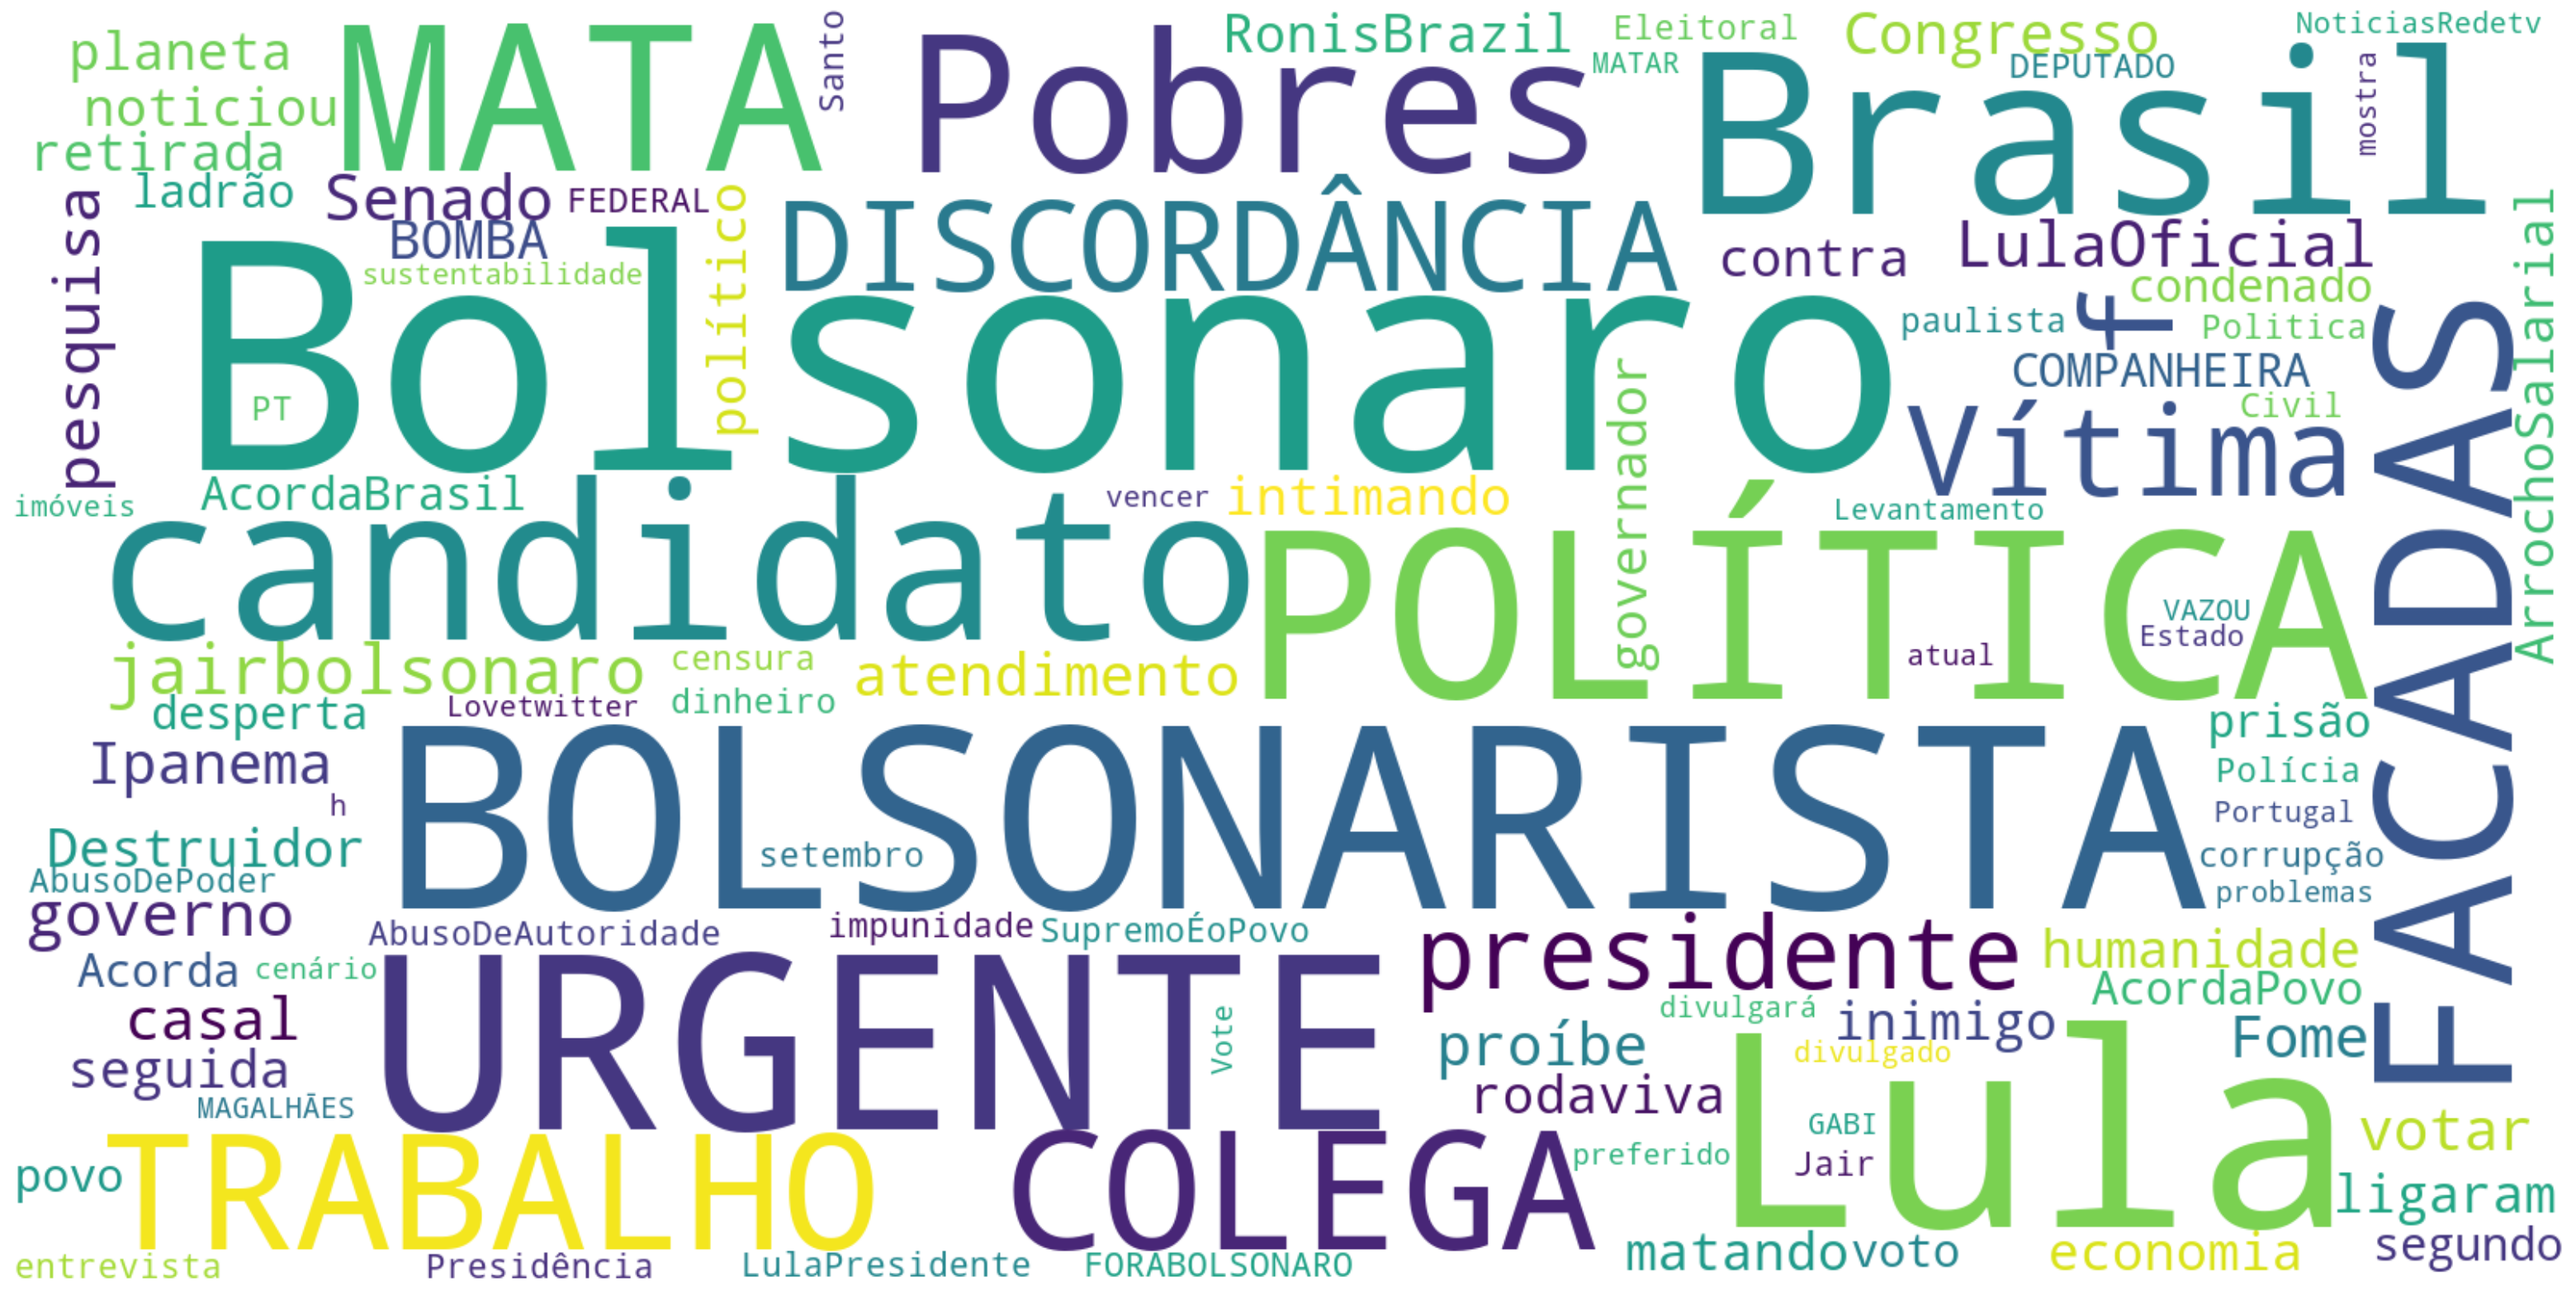

In [152]:
wordcloud_01 = WordCloud(stopwords=cloud_stopwords, width=1600, height=800, max_font_size=200, max_words=100, collocations=False, background_color='white').generate(clean_string_01)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_01, interpolation="bilinear")
plt.axis("off")
plt.show()

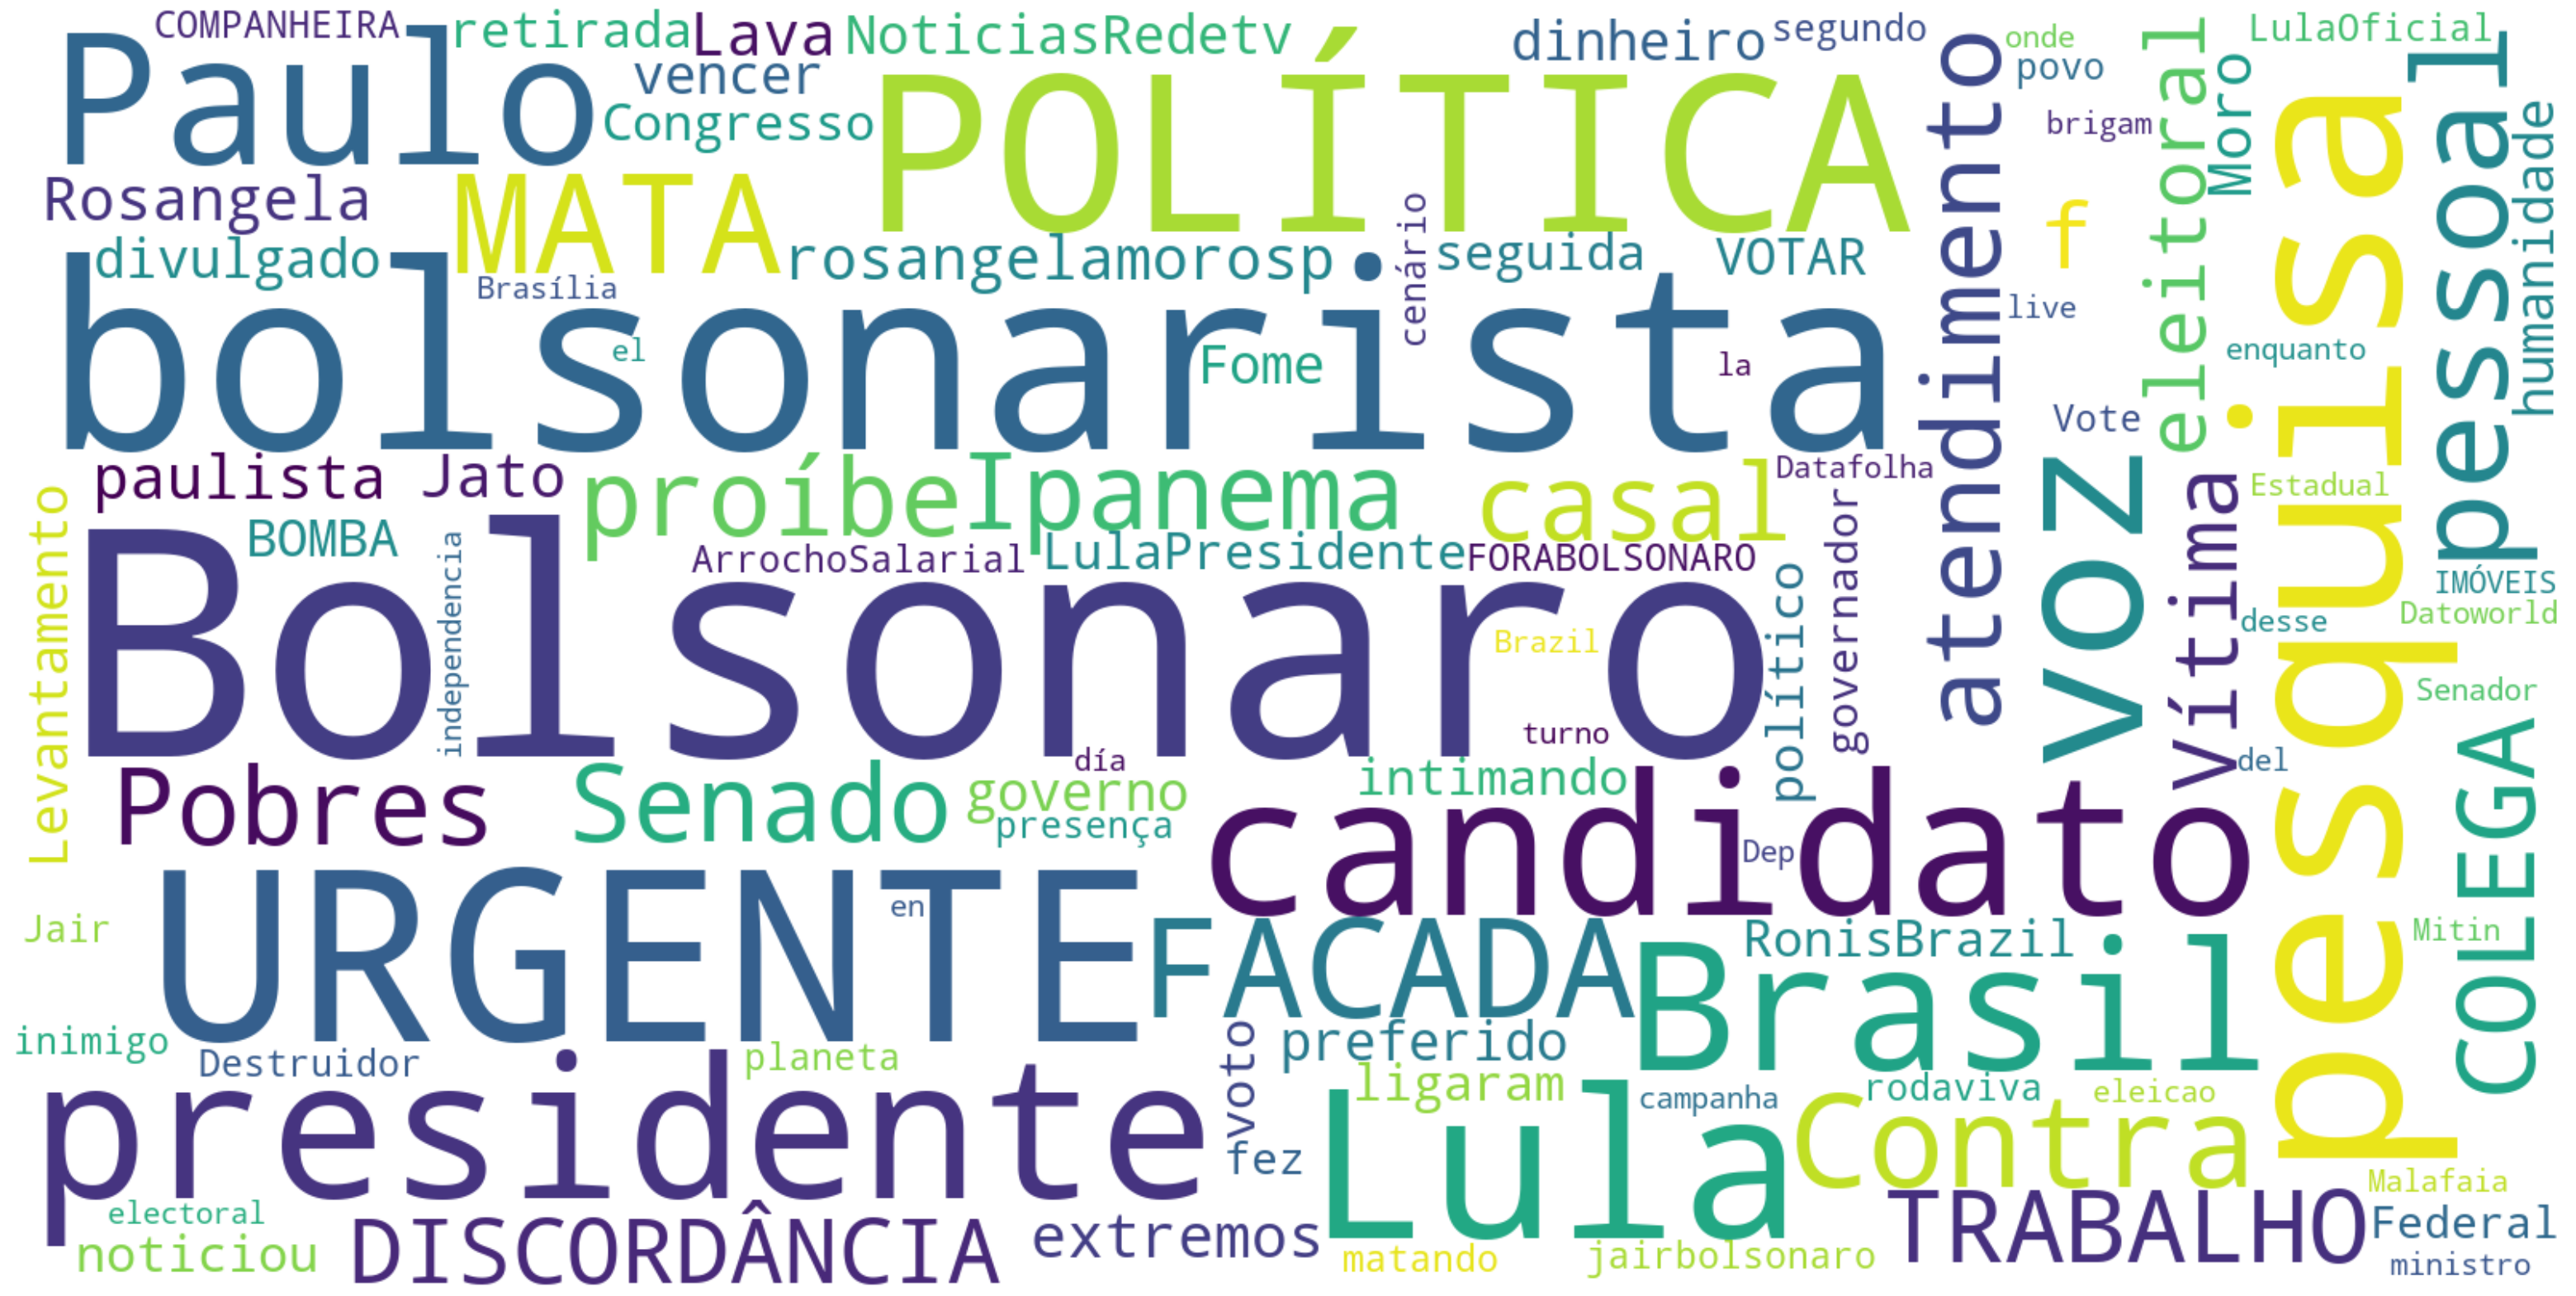

In [153]:
wordcloud_02 = WordCloud(stopwords=cloud_stopwords, width=1600, height=800, max_font_size=200, max_words=100, collocations=False, background_color='white').generate(clean_string_02)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_02, interpolation="bilinear")
plt.axis("off")
plt.show()

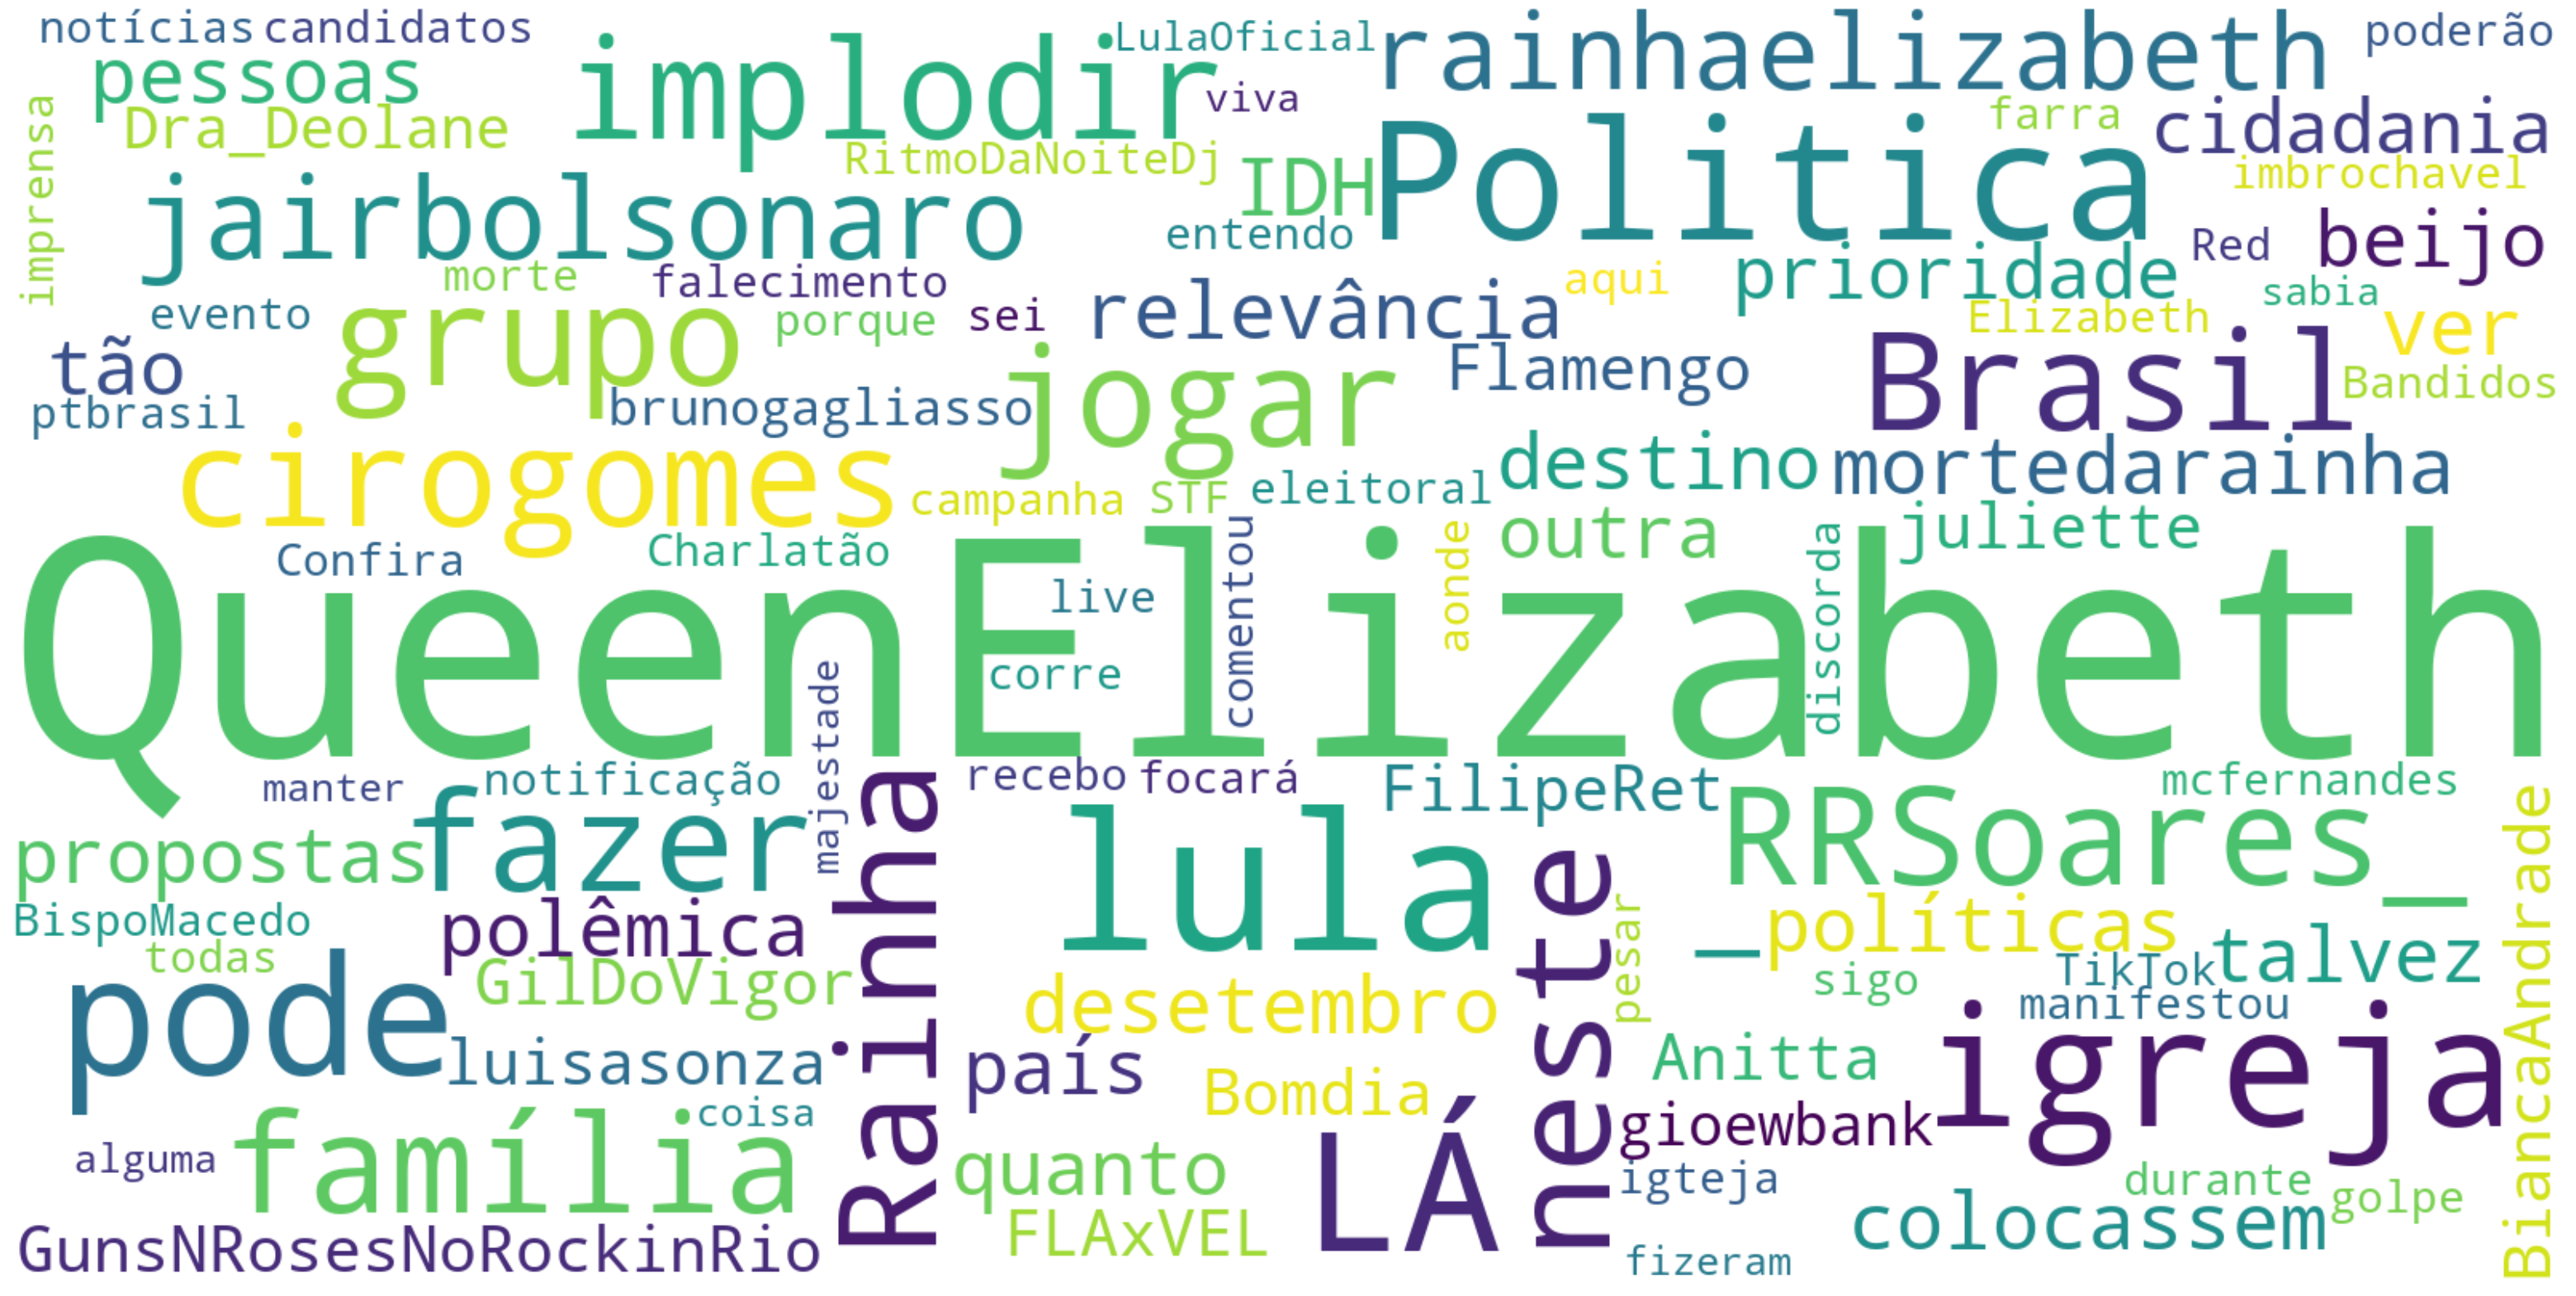

In [154]:
wordcloud_03 = WordCloud(stopwords=cloud_stopwords, width=1600, height=800, max_font_size=200, max_words=100, collocations=False, background_color='white').generate(clean_string_03)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_03, interpolation="bilinear")
plt.axis("off")
plt.show()

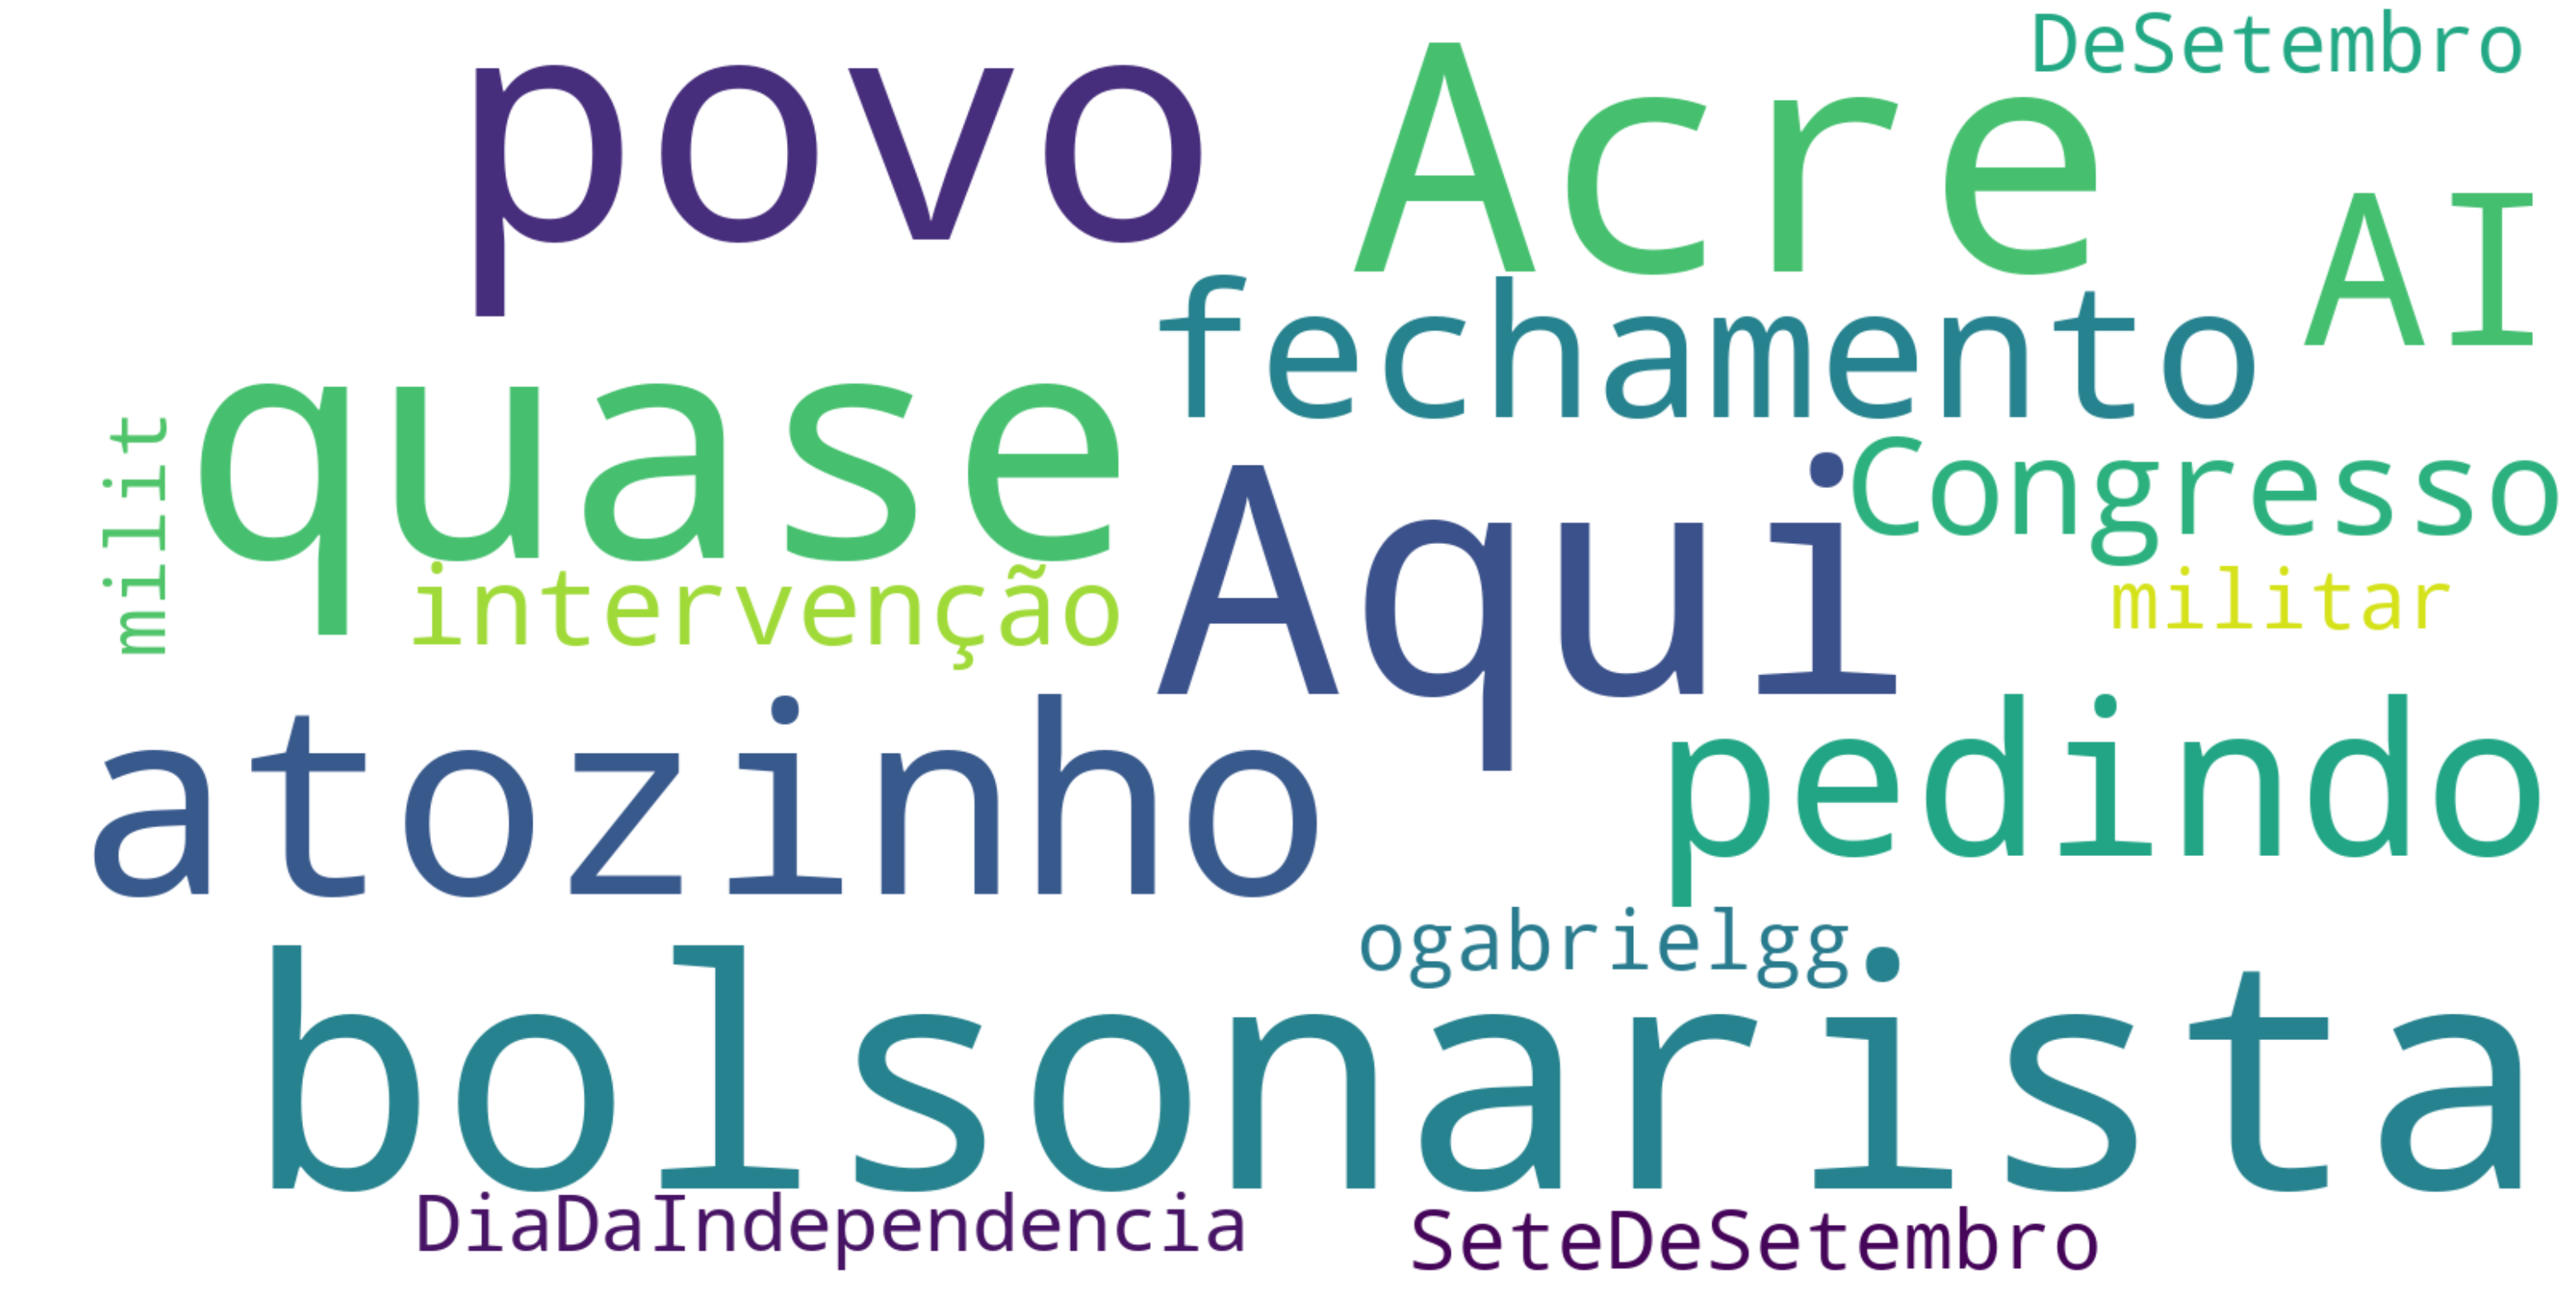

In [155]:
wordcloud_04 = WordCloud(stopwords=cloud_stopwords, width=1600, height=800, max_font_size=200, max_words=100, collocations=False, background_color='white').generate(clean_string_04)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_04, interpolation="bilinear")
plt.axis("off")
plt.show()